# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
new_cities = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind = []
country = []
date = []

In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
record_counter = 0
set_counter = 0
print('Beginning Data Retrieval')
print('------------------------')


for city in cities:
    query_url = url + "&q=" + city
    response = requests.get(query_url).json()
    if record_counter < 50:
        record_counter += 1
    else:
        set_counter += 1
        record_counter = 0

    print('Processing record {} of set {} | {}'.format(record_counter, set_counter, city))
    print(url)
    print(response)
    try:
         cloudiness.append(response['clouds']['all'])
         country.append(response['sys']['country'])
         date.append(response['dt'])
         humidity.append(response['main']['humidity'])
         max_temp.append(response['main']['temp_max'])
         lat.append(response['coord']['lat'])
         lng.append(response['coord']['lon'])
         wind.append(response['wind']['speed'])
         new_cities.append(city)
         #print(new_cities)
         #print(cities)
    except:
         print("failed to append data from city")
         pass
    
print('-------------------------')
print('Data Retrieval Complete')
print('-------------------------')

Beginning Data Retrieval
------------------------
Processing record 1 of set 0 | albany
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15b71d83b741d71ec2
{'coord': {'lon': -73.97, 'lat': 42.6}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 62.71, 'feels_like': 56.98, 'temp_min': 61, 'temp_max': 64, 'pressure': 1009, 'humidity': 52}, 'visibility': 10000, 'wind': {'speed': 8.01, 'deg': 267, 'gust': 21.99}, 'clouds': {'all': 97}, 'dt': 1598495246, 'sys': {'type': 3, 'id': 19530, 'country': 'US', 'sunrise': 1598436905, 'sunset': 1598485226}, 'timezone': -14400, 'id': 5106841, 'name': 'Albany', 'cod': 200}
Processing record 2 of set 0 | naryan-mar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15b71d83b741d71ec2
{'coord': {'lon': 53.09, 'lat': 67.67}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'

Processing record 14 of set 0 | new norfolk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15b71d83b741d71ec2
{'coord': {'lon': 147.06, 'lat': -42.78}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 55.83, 'feels_like': 51.28, 'temp_min': 52, 'temp_max': 59, 'pressure': 1005, 'humidity': 73}, 'visibility': 10000, 'wind': {'speed': 7, 'deg': 340, 'gust': 13}, 'rain': {'1h': 0.25}, 'clouds': {'all': 100}, 'dt': 1598495249, 'sys': {'type': 3, 'id': 2031307, 'country': 'AU', 'sunrise': 1598474797, 'sunset': 1598514026}, 'timezone': 36000, 'id': 2155415, 'name': 'New Norfolk', 'cod': 200}
Processing record 15 of set 0 | chokurdakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15b71d83b741d71ec2
{'coord': {'lon': 147.92, 'lat': 70.63}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 

Processing record 27 of set 0 | kaitangata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15b71d83b741d71ec2
{'coord': {'lon': 169.85, 'lat': -46.28}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 48.99, 'feels_like': 43.99, 'temp_min': 48.99, 'temp_max': 48.99, 'pressure': 1008, 'humidity': 68}, 'visibility': 10000, 'wind': {'speed': 4.56, 'deg': 197}, 'rain': {'1h': 0.23}, 'clouds': {'all': 99}, 'dt': 1598495252, 'sys': {'type': 3, 'id': 2000217, 'country': 'NZ', 'sunrise': 1598469614, 'sunset': 1598508273}, 'timezone': 43200, 'id': 2208248, 'name': 'Kaitangata', 'cod': 200}
Processing record 28 of set 0 | vaitupu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15b71d83b741d71ec2
{'cod': '404', 'message': 'city not found'}
failed to append data from city
Processing record 29 of set 0 | qaanaaq
http://api.openweathermap.org/data/2.5/weather?

Processing record 41 of set 0 | tasiilaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15b71d83b741d71ec2
{'coord': {'lon': -37.64, 'lat': 65.61}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 32, 'feels_like': 23.79, 'temp_min': 32, 'temp_max': 32, 'pressure': 1015, 'humidity': 80}, 'visibility': 10000, 'wind': {'speed': 6.93, 'deg': 230}, 'clouds': {'all': 0}, 'dt': 1598495255, 'sys': {'type': 1, 'id': 81, 'country': 'GL', 'sunrise': 1598511183, 'sunset': 1598566279}, 'timezone': -7200, 'id': 3424607, 'name': 'Tasiilaq', 'cod': 200}
Processing record 42 of set 0 | pachino
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15b71d83b741d71ec2
{'coord': {'lon': 15.09, 'lat': 36.72}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 71.01, 'feels_like': 72.64, 'temp_min': 71

Processing record 3 of set 1 | kyaikkami
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15b71d83b741d71ec2
{'coord': {'lon': 97.57, 'lat': 16.08}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 81.48, 'feels_like': 86.92, 'temp_min': 81.48, 'temp_max': 81.48, 'pressure': 1010, 'humidity': 81, 'sea_level': 1010, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 8.81, 'deg': 260}, 'rain': {'1h': 0.6}, 'clouds': {'all': 79}, 'dt': 1598495258, 'sys': {'country': 'MM', 'sunrise': 1598483777, 'sunset': 1598528797}, 'timezone': 23400, 'id': 1317402, 'name': 'Kyaikkami', 'cod': 200}
Processing record 4 of set 1 | kapaa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15b71d83b741d71ec2
{'coord': {'lon': -159.32, 'lat': 22.08}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'ma

Processing record 17 of set 1 | punta arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15b71d83b741d71ec2
{'coord': {'lon': -70.92, 'lat': -53.15}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 34.3, 'feels_like': 20.59, 'temp_min': 33.01, 'temp_max': 35.6, 'pressure': 997, 'humidity': 80}, 'visibility': 10000, 'wind': {'speed': 17.22, 'deg': 310}, 'clouds': {'all': 41}, 'dt': 1598495262, 'sys': {'type': 1, 'id': 8487, 'country': 'CL', 'sunrise': 1598441715, 'sunset': 1598478952}, 'timezone': -10800, 'id': 3874787, 'name': 'Punta Arenas', 'cod': 200}
Processing record 18 of set 1 | alofi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15b71d83b741d71ec2
{'coord': {'lon': -169.92, 'lat': -19.06}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 78.8, 'f

Processing record 32 of set 1 | poya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15b71d83b741d71ec2
{'coord': {'lon': 165.15, 'lat': -21.35}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 73.85, 'feels_like': 66.87, 'temp_min': 73.85, 'temp_max': 73.85, 'pressure': 1018, 'humidity': 51, 'sea_level': 1018, 'grnd_level': 1017}, 'visibility': 10000, 'wind': {'speed': 14.9, 'deg': 141}, 'clouds': {'all': 10}, 'dt': 1598495265, 'sys': {'country': 'NC', 'sunrise': 1598469208, 'sunset': 1598510934}, 'timezone': 39600, 'id': 2138522, 'name': 'Poya', 'cod': 200}
Processing record 33 of set 1 | barrow
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15b71d83b741d71ec2
{'coord': {'lon': -156.79, 'lat': 71.29}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 39.2, 'feels_

Processing record 47 of set 1 | richards bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15b71d83b741d71ec2
{'coord': {'lon': 32.04, 'lat': -28.78}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 60.28, 'feels_like': 58.77, 'temp_min': 60.28, 'temp_max': 60.28, 'pressure': 1025, 'humidity': 65, 'sea_level': 1025, 'grnd_level': 1024}, 'visibility': 10000, 'wind': {'speed': 2.1, 'deg': 304}, 'clouds': {'all': 96}, 'dt': 1598495269, 'sys': {'country': 'ZA', 'sunrise': 1598501504, 'sunset': 1598542518}, 'timezone': 7200, 'id': 962367, 'name': 'Richards Bay', 'cod': 200}
Processing record 48 of set 1 | buala
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15b71d83b741d71ec2
{'coord': {'lon': 159.59, 'lat': -8.14}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'tem

Processing record 9 of set 2 | igbo ora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15b71d83b741d71ec2
{'coord': {'lon': 3.28, 'lat': 7.43}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 70.36, 'feels_like': 75.7, 'temp_min': 70.36, 'temp_max': 70.36, 'pressure': 1014, 'humidity': 95, 'sea_level': 1014, 'grnd_level': 995}, 'visibility': 10000, 'wind': {'speed': 3.04, 'deg': 212}, 'clouds': {'all': 100}, 'dt': 1598495272, 'sys': {'country': 'NG', 'sunrise': 1598506795, 'sunset': 1598551029}, 'timezone': 3600, 'id': 2338669, 'name': 'Igbo-Ora', 'cod': 200}
Processing record 10 of set 2 | mandali
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15b71d83b741d71ec2
{'coord': {'lon': 45.55, 'lat': 33.75}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 78.66, 'feels

Processing record 23 of set 2 | tsihombe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15b71d83b741d71ec2
{'cod': '404', 'message': 'city not found'}
failed to append data from city
Processing record 24 of set 2 | sakaiminato
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15b71d83b741d71ec2
{'coord': {'lon': 133.23, 'lat': 35.55}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 92.48, 'feels_like': 92.21, 'temp_min': 91.4, 'temp_max': 93.2, 'pressure': 1008, 'humidity': 52}, 'visibility': 10000, 'wind': {'speed': 16.11, 'deg': 170, 'gust': 27.51}, 'clouds': {'all': 20}, 'dt': 1598495275, 'sys': {'type': 1, 'id': 8028, 'country': 'JP', 'sunrise': 1598474136, 'sunset': 1598521324}, 'timezone': 32400, 'id': 1853174, 'name': 'Sakaiminato', 'cod': 200}
Processing record 25 of set 2 | puerto ayora
http://api.openweathermap.org/data/2.5/weather?un

Processing record 37 of set 2 | yumen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15b71d83b741d71ec2
{'coord': {'lon': 97.2, 'lat': 40.28}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 63.7, 'feels_like': 51.01, 'temp_min': 63.7, 'temp_max': 63.7, 'pressure': 1009, 'humidity': 29, 'sea_level': 1009, 'grnd_level': 852}, 'visibility': 10000, 'wind': {'speed': 15.88, 'deg': 86}, 'clouds': {'all': 13}, 'dt': 1598495278, 'sys': {'country': 'CN', 'sunrise': 1598482445, 'sunset': 1598530306}, 'timezone': 28800, 'id': 1528998, 'name': 'Yumen', 'cod': 200}
Processing record 38 of set 2 | zhigansk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15b71d83b741d71ec2
{'coord': {'lon': 123.37, 'lat': 66.77}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 54.77, 'feels_lik

Processing record 50 of set 2 | vila franca do campo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15b71d83b741d71ec2
{'coord': {'lon': -25.43, 'lat': 37.72}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 75.2, 'feels_like': 78.82, 'temp_min': 75.2, 'temp_max': 75.2, 'pressure': 1023, 'humidity': 94}, 'visibility': 10000, 'wind': {'speed': 10.29, 'deg': 220}, 'clouds': {'all': 75}, 'dt': 1598495281, 'sys': {'type': 1, 'id': 6899, 'country': 'PT', 'sunrise': 1598512085, 'sunset': 1598559517}, 'timezone': 0, 'id': 3372472, 'name': 'Vila Franca do Campo', 'cod': 200}
Processing record 0 of set 3 | cabo rojo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15b71d83b741d71ec2
{'coord': {'lon': -67.15, 'lat': 18.09}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 79.

Processing record 12 of set 3 | lagoa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15b71d83b741d71ec2
{'coord': {'lon': -27.98, 'lat': 39.05}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 73.24, 'feels_like': 79.36, 'temp_min': 73.24, 'temp_max': 73.24, 'pressure': 1021, 'humidity': 90, 'sea_level': 1021, 'grnd_level': 1016}, 'visibility': 10000, 'wind': {'speed': 2.8, 'deg': 268}, 'clouds': {'all': 27}, 'dt': 1598495284, 'sys': {'country': 'PT', 'sunrise': 1598512601, 'sunset': 1598560225}, 'timezone': 0, 'id': 3372964, 'name': 'Lagoa', 'cod': 200}
Processing record 13 of set 3 | saldanha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15b71d83b741d71ec2
{'coord': {'lon': 17.94, 'lat': -33.01}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 46.4, 'feels_li

Processing record 25 of set 3 | kuala sungai baru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15b71d83b741d71ec2
{'coord': {'lon': 102.04, 'lat': 2.36}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 81.25, 'feels_like': 88.66, 'temp_min': 80.01, 'temp_max': 82.4, 'pressure': 1011, 'humidity': 83}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 170}, 'clouds': {'all': 20}, 'dt': 1598495288, 'sys': {'type': 1, 'id': 9437, 'country': 'MY', 'sunrise': 1598483312, 'sunset': 1598527117}, 'timezone': 28800, 'id': 1759513, 'name': 'Kuala Sungai Baru', 'cod': 200}
Processing record 26 of set 3 | ca mau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15b71d83b741d71ec2
{'coord': {'lon': 105.15, 'lat': 9.18}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 88.7,

Processing record 39 of set 3 | lerwick
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15b71d83b741d71ec2
{'coord': {'lon': -1.15, 'lat': 60.15}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 50, 'feels_like': 44.6, 'temp_min': 50, 'temp_max': 50, 'pressure': 1015, 'humidity': 87}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 330}, 'clouds': {'all': 77}, 'dt': 1598495292, 'sys': {'type': 1, 'id': 1438, 'country': 'GB', 'sunrise': 1598503696, 'sunset': 1598556254}, 'timezone': 3600, 'id': 2644605, 'name': 'Lerwick', 'cod': 200}
Processing record 40 of set 3 | guerrero negro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15b71d83b741d71ec2
{'coord': {'lon': -114.06, 'lat': 27.98}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 74.17, 'feels_like': 73.9, 'te

Processing record 1 of set 4 | udachnyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15b71d83b741d71ec2
{'coord': {'lon': 112.4, 'lat': 66.42}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 64.17, 'feels_like': 59, 'temp_min': 64.17, 'temp_max': 64.17, 'pressure': 1016, 'humidity': 35, 'sea_level': 1016, 'grnd_level': 982}, 'visibility': 10000, 'wind': {'speed': 3.91, 'deg': 240}, 'clouds': {'all': 97}, 'dt': 1598495295, 'sys': {'country': 'RU', 'sunrise': 1598474844, 'sunset': 1598530613}, 'timezone': 32400, 'id': 2014624, 'name': 'Udachny', 'cod': 200}
Processing record 2 of set 4 | russell
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15b71d83b741d71ec2
{'coord': {'lon': -85.2, 'lat': 32.35}, 'weather': [{'id': 721, 'main': 'Haze', 'description': 'haze', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 80.13, 'feels_like': 

Processing record 17 of set 4 | umm ruwabah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15b71d83b741d71ec2
{'cod': '404', 'message': 'city not found'}
failed to append data from city
Processing record 18 of set 4 | maputo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15b71d83b741d71ec2
{'coord': {'lon': 32.59, 'lat': -25.97}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 61, 'feels_like': 55.18, 'temp_min': 60.01, 'temp_max': 62.01, 'pressure': 1022, 'humidity': 72}, 'visibility': 10000, 'wind': {'speed': 11.41, 'deg': 230}, 'clouds': {'all': 40}, 'dt': 1598495299, 'sys': {'type': 1, 'id': 2202, 'country': 'MZ', 'sunrise': 1598501228, 'sunset': 1598542530}, 'timezone': 7200, 'id': 1040652, 'name': 'Maputo', 'cod': 200}
Processing record 19 of set 4 | luba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4

Processing record 32 of set 4 | amahai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15b71d83b741d71ec2
{'coord': {'lon': 128.92, 'lat': -3.33}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 81.86, 'feels_like': 85.26, 'temp_min': 81.86, 'temp_max': 81.86, 'pressure': 1011, 'humidity': 75, 'sea_level': 1011, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 10.47, 'deg': 131}, 'clouds': {'all': 66}, 'dt': 1598495302, 'sys': {'country': 'ID', 'sunrise': 1598477103, 'sunset': 1598520426}, 'timezone': 32400, 'id': 1651591, 'name': 'Amahai', 'cod': 200}
Processing record 33 of set 4 | kuusamo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15b71d83b741d71ec2
{'coord': {'lon': 29.18, 'lat': 65.97}, 'weather': [{'id': 521, 'main': 'Rain', 'description': 'shower rain', 'icon': '09d'}], 'base': 'stations', 'main': {'temp': 46.4, 'feel

Processing record 46 of set 4 | shelburne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15b71d83b741d71ec2
{'coord': {'lon': -80.2, 'lat': 44.08}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 63.21, 'feels_like': 65.66, 'temp_min': 62.6, 'temp_max': 64, 'pressure': 1013, 'humidity': 93}, 'visibility': 8047, 'wind': {'speed': 2.24, 'deg': 50}, 'clouds': {'all': 90}, 'dt': 1598495091, 'sys': {'type': 1, 'id': 762, 'country': 'CA', 'sunrise': 1598438272, 'sunset': 1598486849}, 'timezone': -14400, 'id': 6145890, 'name': 'Shelburne', 'cod': 200}
Processing record 47 of set 4 | sisimiut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15b71d83b741d71ec2
{'coord': {'lon': -53.67, 'lat': 66.94}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 46.33, 'feels_like': 43.3,

Processing record 10 of set 5 | marshall
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15b71d83b741d71ec2
{'coord': {'lon': -86.33, 'lat': 34.38}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 77.27, 'feels_like': 84.83, 'temp_min': 75.99, 'temp_max': 78.01, 'pressure': 1019, 'humidity': 88}, 'visibility': 10000, 'wind': {'speed': 3.36, 'deg': 110}, 'clouds': {'all': 1}, 'dt': 1598495309, 'sys': {'type': 1, 'id': 3127, 'country': 'US', 'sunrise': 1598440492, 'sunset': 1598487571}, 'timezone': -18000, 'id': 4074736, 'name': 'Marshall', 'cod': 200}
Processing record 11 of set 5 | lumsden
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15b71d83b741d71ec2
{'coord': {'lon': -104.87, 'lat': 50.65}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 68.95, 'feels_like': 63.66

Processing record 23 of set 5 | chaman
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15b71d83b741d71ec2
{'coord': {'lon': 66.45, 'lat': 30.92}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 73.76, 'feels_like': 74.97, 'temp_min': 73.76, 'temp_max': 73.76, 'pressure': 1006, 'humidity': 56, 'sea_level': 1006, 'grnd_level': 865}, 'visibility': 10000, 'wind': {'speed': 1.83, 'deg': 211}, 'clouds': {'all': 0}, 'dt': 1598495312, 'sys': {'country': 'PK', 'sunrise': 1598490467, 'sunset': 1598537042}, 'timezone': 18000, 'id': 1181611, 'name': 'Chaman', 'cod': 200}
Processing record 24 of set 5 | aklavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15b71d83b741d71ec2
{'coord': {'lon': -135.01, 'lat': 68.22}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 57.2, 'feels_like

Processing record 36 of set 5 | kopavogur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15b71d83b741d71ec2
{'coord': {'lon': -21.91, 'lat': 64.11}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 49.33, 'feels_like': 44.17, 'temp_min': 48.2, 'temp_max': 50, 'pressure': 1017, 'humidity': 66}, 'visibility': 10000, 'wind': {'speed': 4.7, 'deg': 320}, 'clouds': {'all': 90}, 'dt': 1598495270, 'sys': {'type': 1, 'id': 91, 'country': 'IS', 'sunrise': 1598507809, 'sunset': 1598562104}, 'timezone': 0, 'id': 3415212, 'name': 'Kopavogur', 'cod': 200}
Processing record 37 of set 5 | finote selam
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15b71d83b741d71ec2
{'coord': {'lon': 37.27, 'lat': 10.7}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 55.92, 'feels_like': 56.52, 

Processing record 49 of set 5 | bolivar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15b71d83b741d71ec2
{'coord': {'lon': -93.41, 'lat': 37.61}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 77.9, 'feels_like': 79.16, 'temp_min': 77, 'temp_max': 79, 'pressure': 1011, 'humidity': 71}, 'visibility': 10000, 'wind': {'speed': 9.33, 'deg': 160}, 'clouds': {'all': 100}, 'dt': 1598495318, 'sys': {'type': 3, 'id': 2003739, 'country': 'US', 'sunrise': 1598441967, 'sunset': 1598489493}, 'timezone': -18000, 'id': 4377835, 'name': 'Bolivar', 'cod': 200}
Processing record 50 of set 5 | ostrovnoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15b71d83b741d71ec2
{'coord': {'lon': 39.51, 'lat': 68.05}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 51.4, 'feels_like': 47.28

Processing record 12 of set 6 | bathsheba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15b71d83b741d71ec2
{'coord': {'lon': -59.52, 'lat': 13.22}, 'weather': [{'id': 521, 'main': 'Rain', 'description': 'shower rain', 'icon': '09n'}], 'base': 'stations', 'main': {'temp': 80.6, 'feels_like': 87.44, 'temp_min': 80.6, 'temp_max': 80.6, 'pressure': 1014, 'humidity': 88}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 70}, 'clouds': {'all': 75}, 'dt': 1598495321, 'sys': {'type': 1, 'id': 8772, 'country': 'BB', 'sunrise': 1598435209, 'sunset': 1598479988}, 'timezone': -14400, 'id': 3374083, 'name': 'Bathsheba', 'cod': 200}
Processing record 13 of set 6 | kruisfontein
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15b71d83b741d71ec2
{'coord': {'lon': 24.73, 'lat': -34}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 57, 'feels_like': 5

Processing record 26 of set 6 | talavera de la reina
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15b71d83b741d71ec2
{'coord': {'lon': -4.83, 'lat': 39.96}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 71.69, 'feels_like': 67.91, 'temp_min': 71.69, 'temp_max': 71.69, 'pressure': 1018, 'humidity': 28, 'sea_level': 1018, 'grnd_level': 976}, 'visibility': 10000, 'wind': {'speed': 1.74, 'deg': 252}, 'clouds': {'all': 0}, 'dt': 1598495324, 'sys': {'country': 'ES', 'sunrise': 1598506973, 'sunset': 1598554743}, 'timezone': 7200, 'id': 2510693, 'name': 'Talavera de la Reina', 'cod': 200}
Processing record 27 of set 6 | cherepanovo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15b71d83b741d71ec2
{'coord': {'lon': 83.38, 'lat': 54.22}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main':

Processing record 39 of set 6 | belyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15b71d83b741d71ec2
{'coord': {'lon': 32.94, 'lat': 55.84}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 50.88, 'feels_like': 46.83, 'temp_min': 50.88, 'temp_max': 50.88, 'pressure': 1007, 'humidity': 92, 'sea_level': 1007, 'grnd_level': 985}, 'visibility': 10000, 'wind': {'speed': 6.71, 'deg': 146}, 'clouds': {'all': 50}, 'dt': 1598495328, 'sys': {'country': 'RU', 'sunrise': 1598496231, 'sunset': 1598547359}, 'timezone': 10800, 'id': 577576, 'name': 'Belyy', 'cod': 200}
Processing record 40 of set 6 | araouane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15b71d83b741d71ec2
{'coord': {'lon': -3.53, 'lat': 18.9}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 93.04, 'feels_l

Processing record 1 of set 7 | is
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15b71d83b741d71ec2
{'cod': '404', 'message': 'city not found'}
failed to append data from city
Processing record 2 of set 7 | houma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15b71d83b741d71ec2
{'coord': {'lon': -90.72, 'lat': 29.6}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 80.96, 'feels_like': 84.74, 'temp_min': 80.01, 'temp_max': 82, 'pressure': 1010, 'humidity': 88}, 'visibility': 10000, 'wind': {'speed': 13.87, 'deg': 110, 'gust': 23.04}, 'clouds': {'all': 1}, 'dt': 1598495331, 'sys': {'type': 1, 'id': 4444, 'country': 'US', 'sunrise': 1598441847, 'sunset': 1598488322}, 'timezone': -18000, 'id': 4328010, 'name': 'Houma', 'cod': 200}
Processing record 3 of set 7 | bengkulu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100

Processing record 15 of set 7 | rosetta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15b71d83b741d71ec2
{'coord': {'lon': 30.42, 'lat': 31.4}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 78.8, 'feels_like': 80.17, 'temp_min': 78.8, 'temp_max': 78.8, 'pressure': 1008, 'humidity': 69}, 'visibility': 10000, 'wind': {'speed': 9.17, 'deg': 330}, 'clouds': {'all': 40}, 'dt': 1598495334, 'sys': {'type': 1, 'id': 2511, 'country': 'EG', 'sunrise': 1598499089, 'sunset': 1598545711}, 'timezone': 7200, 'id': 350203, 'name': 'Rosetta', 'cod': 200}
Processing record 16 of set 7 | niono
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15b71d83b741d71ec2
{'coord': {'lon': -5.99, 'lat': 14.25}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 78.62, 'feels_like': 82.8, '

Processing record 28 of set 7 | chara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15b71d83b741d71ec2
{'coord': {'lon': 118.26, 'lat': 56.91}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 55.94, 'feels_like': 51.71, 'temp_min': 55.94, 'temp_max': 55.94, 'pressure': 1015, 'humidity': 44, 'sea_level': 1015, 'grnd_level': 934}, 'visibility': 10000, 'wind': {'speed': 1.79, 'deg': 99}, 'clouds': {'all': 0}, 'dt': 1598495337, 'sys': {'country': 'RU', 'sunrise': 1598475561, 'sunset': 1598527084}, 'timezone': 32400, 'id': 2025630, 'name': 'Chara', 'cod': 200}
Processing record 29 of set 7 | sanandaj
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15b71d83b741d71ec2
{'coord': {'lon': 46.99, 'lat': 35.31}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 69.8, 'feels_like': 60

Processing record 41 of set 7 | utrecht
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15b71d83b741d71ec2
{'coord': {'lon': 5.25, 'lat': 52}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 56.28, 'feels_like': 54.86, 'temp_min': 54, 'temp_max': 59, 'pressure': 1016, 'humidity': 92}, 'visibility': 10000, 'wind': {'speed': 4.72, 'deg': 238}, 'clouds': {'all': 83}, 'dt': 1598495057, 'sys': {'type': 3, 'id': 2009768, 'country': 'NL', 'sunrise': 1598503401, 'sunset': 1598553478}, 'timezone': 7200, 'id': 2745909, 'name': 'Provincie Utrecht', 'cod': 200}
Processing record 42 of set 7 | shaygino
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15b71d83b741d71ec2
{'coord': {'lon': 46.86, 'lat': 57.77}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 57.61, 'feels_like':

Processing record 3 of set 8 | el reno
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15b71d83b741d71ec2
{'coord': {'lon': -97.95, 'lat': 35.53}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 78.26, 'feels_like': 74.86, 'temp_min': 77, 'temp_max': 79, 'pressure': 1013, 'humidity': 69}, 'visibility': 10000, 'wind': {'speed': 17.22, 'deg': 140}, 'clouds': {'all': 1}, 'dt': 1598495343, 'sys': {'type': 1, 'id': 5709, 'country': 'US', 'sunrise': 1598443204, 'sunset': 1598490435}, 'timezone': -18000, 'id': 4535783, 'name': 'El Reno', 'cod': 200}
Processing record 4 of set 8 | provideniya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15b71d83b741d71ec2
{'coord': {'lon': -173.3, 'lat': 64.38}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 55.4, 'feels_like': 48.2, 'te

Processing record 17 of set 8 | sorland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15b71d83b741d71ec2
{'coord': {'lon': 12.69, 'lat': 67.67}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 49.89, 'feels_like': 41.09, 'temp_min': 49.89, 'temp_max': 49.89, 'pressure': 1010, 'humidity': 68, 'sea_level': 1010, 'grnd_level': 1002}, 'visibility': 10000, 'wind': {'speed': 11.59, 'deg': 347}, 'clouds': {'all': 100}, 'dt': 1598495347, 'sys': {'country': 'NO', 'sunrise': 1598498415, 'sunset': 1598554893}, 'timezone': 7200, 'id': 3137469, 'name': 'Sørland', 'cod': 200}
Processing record 18 of set 8 | macusani
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15b71d83b741d71ec2
{'coord': {'lon': -70.43, 'lat': -14.08}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 3

Processing record 30 of set 8 | mogadishu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15b71d83b741d71ec2
{'coord': {'lon': 45.34, 'lat': 2.04}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 76.39, 'feels_like': 76.08, 'temp_min': 76.39, 'temp_max': 76.39, 'pressure': 1013, 'humidity': 82, 'sea_level': 1013, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 14.52, 'deg': 187}, 'clouds': {'all': 99}, 'dt': 1598495350, 'sys': {'country': 'SO', 'sunrise': 1598496931, 'sunset': 1598540708}, 'timezone': 10800, 'id': 53654, 'name': 'Mogadishu', 'cod': 200}
Processing record 31 of set 8 | ibra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15b71d83b741d71ec2
{'coord': {'lon': 58.53, 'lat': 22.69}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 81.41, 'fee

Processing record 45 of set 8 | lufilufi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15b71d83b741d71ec2
{'coord': {'lon': -171.6, 'lat': -13.87}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 86, 'feels_like': 92.86, 'temp_min': 86, 'temp_max': 86, 'pressure': 1011, 'humidity': 74}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 100, 'gust': 20.8}, 'clouds': {'all': 75}, 'dt': 1598495353, 'sys': {'type': 1, 'id': 7315, 'country': 'WS', 'sunrise': 1598549649, 'sunset': 1598592100}, 'timezone': 46800, 'id': 4035249, 'name': 'Lufilufi', 'cod': 200}
Processing record 46 of set 8 | akdepe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15b71d83b741d71ec2
{'coord': {'lon': 59.38, 'lat': 42.06}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 60.8, 'feels_like': 

Processing record 8 of set 9 | lata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15b71d83b741d71ec2
{'coord': {'lon': -8.33, 'lat': 40.16}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 67.66, 'feels_like': 72.9, 'temp_min': 66.99, 'temp_max': 69.01, 'pressure': 1019, 'humidity': 95}, 'visibility': 10000, 'wind': {'speed': 1.01, 'deg': 271, 'gust': 5.99}, 'clouds': {'all': 42}, 'dt': 1598495357, 'sys': {'type': 3, 'id': 2001739, 'country': 'PT', 'sunrise': 1598507798, 'sunset': 1598555597}, 'timezone': 3600, 'id': 2738381, 'name': 'Lata', 'cod': 200}
Processing record 9 of set 9 | tagusao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15b71d83b741d71ec2
{'coord': {'lon': 117.81, 'lat': 9.19}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 85.87, 'feels

Processing record 23 of set 9 | kaeo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15b71d83b741d71ec2
{'coord': {'lon': 173.78, 'lat': -35.1}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 60.01, 'feels_like': 51.85, 'temp_min': 60.01, 'temp_max': 60.01, 'pressure': 1014, 'humidity': 34}, 'visibility': 10000, 'wind': {'speed': 8.01, 'deg': 295, 'gust': 13}, 'rain': {'1h': 0.2}, 'clouds': {'all': 4}, 'dt': 1598495360, 'sys': {'type': 3, 'id': 2012217, 'country': 'NZ', 'sunrise': 1598467872, 'sunset': 1598508128}, 'timezone': 43200, 'id': 2189343, 'name': 'Kaeo', 'cod': 200}
Processing record 24 of set 9 | deder
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15b71d83b741d71ec2
{'coord': {'lon': 41.45, 'lat': 9.32}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 55.74,

Processing record 37 of set 9 | key west
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15b71d83b741d71ec2
{'coord': {'lon': -81.78, 'lat': 24.56}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 86.04, 'feels_like': 88, 'temp_min': 84, 'temp_max': 87.8, 'pressure': 1016, 'humidity': 70}, 'visibility': 10000, 'wind': {'speed': 14.99, 'deg': 110}, 'clouds': {'all': 1}, 'dt': 1598495364, 'sys': {'type': 1, 'id': 4033, 'country': 'US', 'sunrise': 1598439987, 'sunset': 1598485892}, 'timezone': -14400, 'id': 4160812, 'name': 'Key West', 'cod': 200}
Processing record 38 of set 9 | hami
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15b71d83b741d71ec2
{'coord': {'lon': 93.45, 'lat': 42.8}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 73.74, 'feels_like': 66.7, 'temp_min': 7

Processing record 50 of set 9 | chulym
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15b71d83b741d71ec2
{'coord': {'lon': 80.96, 'lat': 55.1}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 56.62, 'feels_like': 55.8, 'temp_min': 56.62, 'temp_max': 56.62, 'pressure': 1008, 'humidity': 93, 'sea_level': 1008, 'grnd_level': 991}, 'visibility': 10000, 'wind': {'speed': 4.03, 'deg': 225}, 'clouds': {'all': 62}, 'dt': 1598495367, 'sys': {'country': 'RU', 'sunrise': 1598484799, 'sunset': 1598535746}, 'timezone': 25200, 'id': 1507679, 'name': 'Chulym', 'cod': 200}
Processing record 0 of set 10 | aguimes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15b71d83b741d71ec2
{'coord': {'lon': -15.45, 'lat': 27.91}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 78.26, 'feels_li

Processing record 13 of set 10 | bambous virieux
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15b71d83b741d71ec2
{'coord': {'lon': 57.76, 'lat': -20.34}, 'weather': [{'id': 521, 'main': 'Rain', 'description': 'shower rain', 'icon': '09d'}], 'base': 'stations', 'main': {'temp': 66.58, 'feels_like': 66.49, 'temp_min': 66.2, 'temp_max': 66.99, 'pressure': 1022, 'humidity': 93}, 'visibility': 10000, 'wind': {'speed': 9.17, 'deg': 320}, 'clouds': {'all': 75}, 'dt': 1598495370, 'sys': {'type': 1, 'id': 2061, 'country': 'MU', 'sunrise': 1598494919, 'sunset': 1598536760}, 'timezone': 14400, 'id': 1106677, 'name': 'Bambous Virieux', 'cod': 200}
Processing record 14 of set 10 | jinsha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15b71d83b741d71ec2
{'coord': {'lon': 121.07, 'lat': 32.09}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 84.99, 'f

Processing record 25 of set 10 | halalo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15b71d83b741d71ec2
{'cod': '404', 'message': 'city not found'}
failed to append data from city
Processing record 26 of set 10 | arandis
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15b71d83b741d71ec2
{'coord': {'lon': 14.97, 'lat': -22.42}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 57, 'feels_like': 56.19, 'temp_min': 57, 'temp_max': 57, 'pressure': 1019, 'humidity': 88}, 'visibility': 10000, 'wind': {'speed': 3.36, 'deg': 346}, 'clouds': {'all': 0}, 'dt': 1598495373, 'sys': {'type': 3, 'id': 2012545, 'country': 'NA', 'sunrise': 1598505281, 'sunset': 1598546934}, 'timezone': 7200, 'id': 3358670, 'name': 'Arandis', 'cod': 200}
Processing record 27 of set 10 | berlevag
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15

Processing record 40 of set 10 | mentok
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15b71d83b741d71ec2
{'cod': '404', 'message': 'city not found'}
failed to append data from city
Processing record 41 of set 10 | pemangkat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15b71d83b741d71ec2
{'coord': {'lon': 108.97, 'lat': 1.17}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 82.33, 'feels_like': 89.87, 'temp_min': 82.33, 'temp_max': 82.33, 'pressure': 1010, 'humidity': 72, 'sea_level': 1010, 'grnd_level': 1001}, 'visibility': 10000, 'wind': {'speed': 2.37, 'deg': 140}, 'clouds': {'all': 45}, 'dt': 1598495377, 'sys': {'country': 'ID', 'sunrise': 1598481700, 'sunset': 1598525403}, 'timezone': 25200, 'id': 1631637, 'name': 'Pemangkat', 'cod': 200}
Processing record 42 of set 10 | norrtalje
http://api.openweathermap.org/data/2.5/weather?u

Processing record 2 of set 11 | bam
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15b71d83b741d71ec2
{'coord': {'lon': 58.36, 'lat': 29.11}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 79.45, 'feels_like': 69.03, 'temp_min': 79.45, 'temp_max': 79.45, 'pressure': 1006, 'humidity': 21, 'sea_level': 1006, 'grnd_level': 893}, 'visibility': 10000, 'wind': {'speed': 13.29, 'deg': 318}, 'clouds': {'all': 65}, 'dt': 1598495380, 'sys': {'country': 'IR', 'sunrise': 1598492516, 'sunset': 1598538875}, 'timezone': 16200, 'id': 141736, 'name': 'Bam', 'cod': 200}
Processing record 3 of set 11 | grand gaube
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15b71d83b741d71ec2
{'coord': {'lon': 57.66, 'lat': -20.01}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 66.99, 'feels_li

Processing record 15 of set 11 | peleduy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15b71d83b741d71ec2
{'coord': {'lon': 112.74, 'lat': 59.63}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 62.35, 'feels_like': 54.97, 'temp_min': 62.35, 'temp_max': 62.35, 'pressure': 1014, 'humidity': 36, 'sea_level': 1014, 'grnd_level': 990}, 'visibility': 10000, 'wind': {'speed': 7.58, 'deg': 71}, 'clouds': {'all': 85}, 'dt': 1598495383, 'sys': {'country': 'RU', 'sunrise': 1598476417, 'sunset': 1598528877}, 'timezone': 32400, 'id': 2018069, 'name': 'Peleduy', 'cod': 200}
Processing record 16 of set 11 | port hedland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15b71d83b741d71ec2
{'coord': {'lon': 118.57, 'lat': -20.32}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 96

Processing record 28 of set 11 | homer
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15b71d83b741d71ec2
{'coord': {'lon': -151.55, 'lat': 59.64}, 'weather': [{'id': 521, 'main': 'Rain', 'description': 'shower rain', 'icon': '09d'}], 'base': 'stations', 'main': {'temp': 53.6, 'feels_like': 49.44, 'temp_min': 48, 'temp_max': 55.99, 'pressure': 1006, 'humidity': 76}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 0}, 'clouds': {'all': 75}, 'dt': 1598495386, 'sys': {'type': 1, 'id': 7709, 'country': 'US', 'sunrise': 1598453407, 'sunset': 1598505955}, 'timezone': -28800, 'id': 5864145, 'name': 'Homer', 'cod': 200}
Processing record 29 of set 11 | suleja
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15b71d83b741d71ec2
{'coord': {'lon': 7.18, 'lat': 9.18}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 73.4, 'feels_like': 80.58, 'temp_

Processing record 41 of set 11 | yomitan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15b71d83b741d71ec2
{'cod': '404', 'message': 'city not found'}
failed to append data from city
Processing record 42 of set 11 | southbridge
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15b71d83b741d71ec2
{'coord': {'lon': -72.03, 'lat': 42.08}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 61.12, 'feels_like': 54.84, 'temp_min': 60.01, 'temp_max': 62.01, 'pressure': 1013, 'humidity': 51}, 'visibility': 10000, 'wind': {'speed': 8.25, 'deg': 295}, 'clouds': {'all': 100}, 'dt': 1598495389, 'sys': {'type': 3, 'id': 2033035, 'country': 'US', 'sunrise': 1598436483, 'sunset': 1598484717}, 'timezone': -14400, 'id': 4951594, 'name': 'Southbridge', 'cod': 200}
Processing record 43 of set 11 | kimbe
http://api.openweathermap.org/data/2.5/weather?units=Imper

Processing record 4 of set 12 | northam
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15b71d83b741d71ec2
{'coord': {'lon': -4.22, 'lat': 51.03}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 54.01, 'feels_like': 52.57, 'temp_min': 53.01, 'temp_max': 55, 'pressure': 1017, 'humidity': 95}, 'visibility': 10000, 'wind': {'speed': 4, 'deg': 180, 'gust': 8.01}, 'clouds': {'all': 100}, 'dt': 1598495392, 'sys': {'type': 3, 'id': 2005965, 'country': 'GB', 'sunrise': 1598505792, 'sunset': 1598555632}, 'timezone': 3600, 'id': 2641434, 'name': 'Northam', 'cod': 200}
Processing record 5 of set 12 | gloucester
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15b71d83b741d71ec2
{'coord': {'lon': -2.24, 'lat': 51.87}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 53.62

Processing record 17 of set 12 | solovetskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15b71d83b741d71ec2
{'cod': '404', 'message': 'city not found'}
failed to append data from city
Processing record 18 of set 12 | cocachacra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38bc9c4100893e15b71d83b741d71ec2
{'coord': {'lon': -71.76, 'lat': -17.09}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 60.39, 'feels_like': 59.23, 'temp_min': 60.39, 'temp_max': 60.39, 'pressure': 1018, 'humidity': 82, 'sea_level': 1018, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 4.72, 'deg': 127}, 'clouds': {'all': 100}, 'dt': 1598495396, 'sys': {'country': 'PE', 'sunrise': 1598439483, 'sunset': 1598481587}, 'timezone': -18000, 'id': 3942957, 'name': 'Cocachacra', 'cod': 200}
Processing record 19 of set 12 | kayankulam
http://api.openweathermap.org/data/2.

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
weather_dic = {
    "City" : new_cities,
    "Lat" : lat,
    "Lng" : lng,
    "Max Temp" : max_temp,
    "Humidity" : humidity,
    "Cloudiness" : cloudiness,
    "Wind Speed" : wind,
    "Country" : country,
    "Date" : date
}

In [12]:
print(len(new_cities))
print(len(lat))
print(len(lng))
print(len(max_temp))
print(len(humidity))
print(len(cloudiness))
print(len(wind))
print(len(country))

564
564
564
564
564
564
564
564


In [13]:
weather_df = pd.DataFrame(weather_dic)
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.60,-73.97,64.00,52,97,8.01,US,1598495246
1,naryan-mar,67.67,53.09,53.58,77,100,17.29,RU,1598495246
2,dhaulpur,26.70,77.90,83.95,72,97,8.39,IN,1598495246
3,hithadhoo,-0.60,73.08,83.12,71,65,8.86,MV,1598495246
4,rasht,37.28,49.58,64.40,100,3,2.59,IR,1598495247
...,...,...,...,...,...,...,...,...,...
559,cocachacra,-17.09,-71.76,60.39,82,100,4.72,PE,1598495396
560,kayankulam,9.18,76.50,78.80,83,100,7.20,IN,1598495396
561,aplahoue,6.93,1.68,70.90,95,97,4.63,BJ,1598495396
562,pontianak,-0.03,109.33,82.24,71,95,5.23,ID,1598495396


In [14]:
weather_df.to_csv("weather.csv", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [15]:
weather = weather_df[weather_df['Humidity'] < 100]
weather

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.60,-73.97,64.00,52,97,8.01,US,1598495246
1,naryan-mar,67.67,53.09,53.58,77,100,17.29,RU,1598495246
2,dhaulpur,26.70,77.90,83.95,72,97,8.39,IN,1598495246
3,hithadhoo,-0.60,73.08,83.12,71,65,8.86,MV,1598495246
5,bratsk,56.13,101.61,64.40,68,80,6.71,RU,1598495247
...,...,...,...,...,...,...,...,...,...
559,cocachacra,-17.09,-71.76,60.39,82,100,4.72,PE,1598495396
560,kayankulam,9.18,76.50,78.80,83,100,7.20,IN,1598495396
561,aplahoue,6.93,1.68,70.90,95,97,4.63,BJ,1598495396
562,pontianak,-0.03,109.33,82.24,71,95,5.23,ID,1598495396


In [16]:
#  Get the indices of cities that have humidity over 100%.
indices = weather_df[weather_df['Humidity'] > 100].index.values.astype(int)
indices

array([], dtype=int32)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

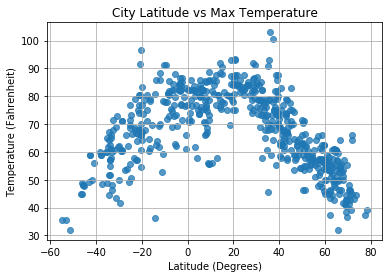

In [29]:
plt.scatter(lat, max_temp, marker="o", alpha=0.75)
plt.xlabel("Latitude (Degrees)")
plt.ylabel("Temperature (Fahrenheit)")
plt.title("City Latitude vs Max Temperature")
plt.savefig("lat_max_temp.png")
plt.grid()
plt.show()

## Latitude vs. Humidity Plot

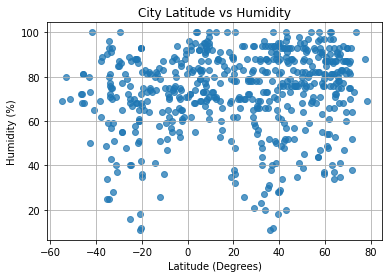

In [28]:
plt.scatter(lat, humidity, marker="o", alpha=0.75)
plt.xlabel("Latitude (Degrees)")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity")
plt.savefig("lat_humidity.png")
plt.grid()
plt.show()

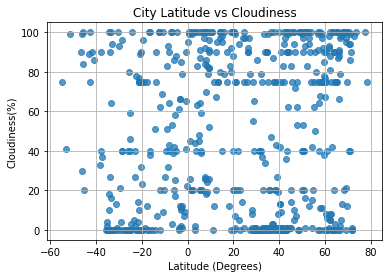

In [27]:
plt.scatter(lat, cloudiness, marker="o", alpha=0.75)
plt.xlabel("Latitude (Degrees)")
plt.ylabel("Cloudiness(%)")
plt.title("City Latitude vs Cloudiness")
plt.savefig("lat_cloudiness.png")
plt.grid()
plt.show()

## Latitude vs. Wind Speed Plot

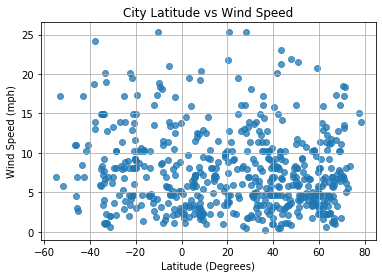

In [26]:
plt.scatter(lat, wind, marker="o", alpha=0.75)
plt.xlabel("Latitude (Degrees)")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs Wind Speed")
plt.savefig("lat_wind.png")
plt.grid()
plt.show()

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [15]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8271188905041935


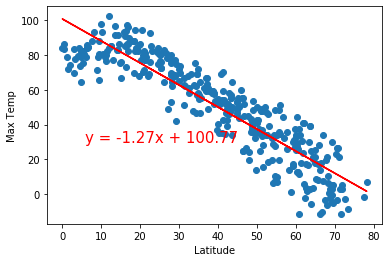

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.39936284758885965


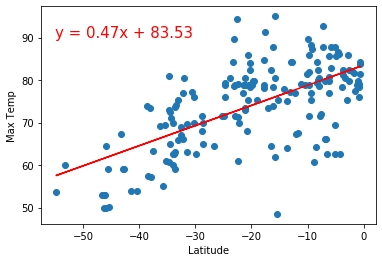

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10829462153873139


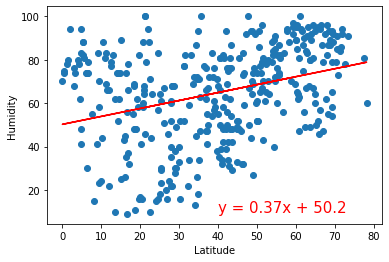

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0008996079328825663


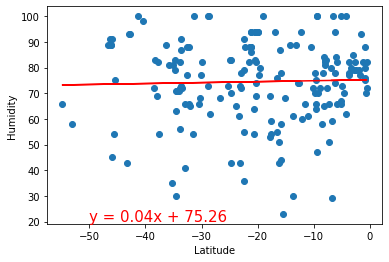

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05768812657005063


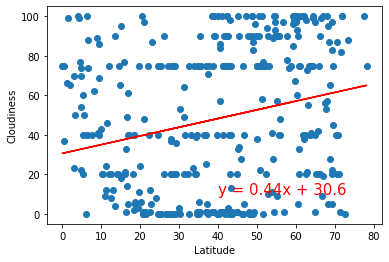

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0684912094859049


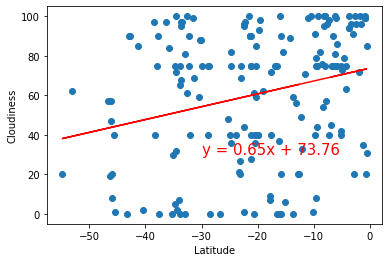

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.023371104533850804


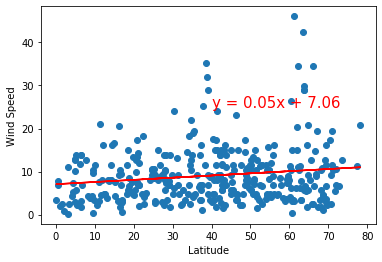

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03381889207758188


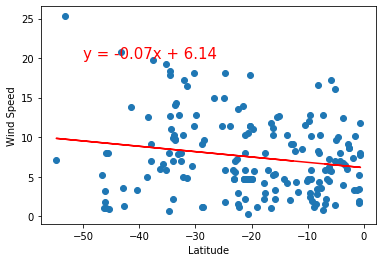